# Import, Upload, Overview

In [539]:
import pandas as pd
import numpy as np
import seaborn as sns
import phik

#ML
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Visualizations
from IPython.display import display, HTML, Image
display(HTML("<style>.container { width:85% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
pd.set_option('max_colwidth', 200)
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 50)

# Fixed random state 
rs = 112022

In [540]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1eQXG7q9vgaUpv6ZWN6cp1_AZBs-U4Lsy', index_col='Id')

In [541]:
display(df.head(),
        df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


None

In [542]:
def pass_value(df): # пропущенные значения бары
    (
        (df.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by = 'space', ascending = False)
        .plot(kind= 'bar', figsize=(19,4), rot = 30, grid=True)
        .set_title('Кол-во пропусков в датасете ...' + '\n')
    );


def check_missings(df: pd.DataFrame) -> pd.DataFrame:
    """
    Функция для вычисления среднего и общего числа пропусков.
    :param df: Набор данных для вычисления статистики.
    :return: Датафрейм со статистикой распределения пропусков.
    """
    na = df.isnull().sum()
    result = pd.DataFrame(data={"Кол-во уникальных": df.nunique(),
                                "Кол-во заполненных": df.shape[0] - na,
                                "Кол-во пропусков": na,
                                "Доля пропусков, %": 100 * na / df.shape[0],
                                "Тип": df.dtypes})
    print(f"Total NA-values = {na.sum()}")
    return result

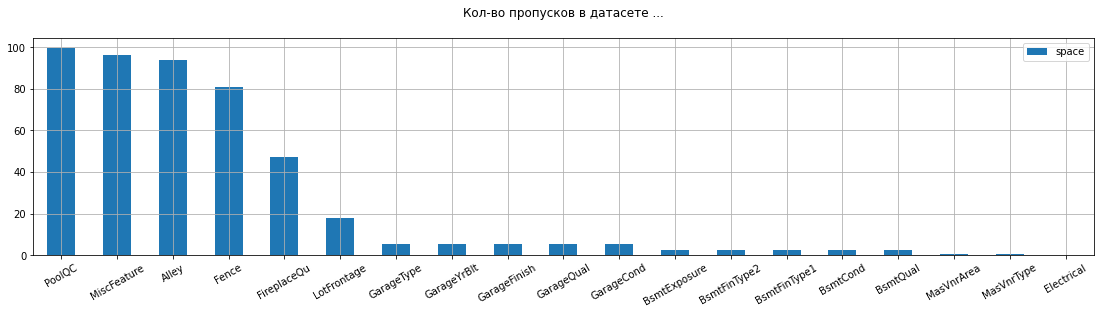

In [543]:
pass_value(df)

In [544]:
check_missings(df).sort_values(by='Кол-во пропусков', ascending=False)

Total NA-values = 6965


,Кол-во уникальных,Кол-во заполненных,Кол-во пропусков,"Доля пропусков, %",Тип
PoolQC,3,7,1453,99.520548,object
MiscFeature,4,54,1406,96.301370,object
Alley,2,91,1369,93.767123,object
Fence,4,281,1179,80.753425,object
FireplaceQu,5,770,690,47.260274,object
LotFrontage,110,1201,259,17.739726,float64
GarageYrBlt,97,1379,81,5.547945,float64
GarageCond,5,1379,81,5.547945,object
GarageType,6,1379,81,5.547945,object
GarageFinish,3,1379,81,5.547945,object


In [545]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# EDA & Preprocessing

In [546]:
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageFinish', 'GarageYrBlt'], axis=1)
df = df.dropna()
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,...,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,...,1,3,1,Gd,8,Typ,0,Attchd,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,...,0,3,1,TA,6,Typ,1,Attchd,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,...,1,3,1,Gd,6,Typ,1,Attchd,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,...,0,3,1,Gd,7,Typ,1,Detchd,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,...,1,4,1,Gd,9,Typ,1,Attchd,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,...,1,3,1,TA,7,Typ,1,Attchd,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,...,0,3,1,TA,7,Min1,2,Attchd,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,...,0,4,1,Gd,9,Typ,2,Attchd,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500


In [547]:
check_missings(df).sort_values(by='Кол-во пропусков', ascending=False)

Total NA-values = 0


,Кол-во уникальных,Кол-во заполненных,Кол-во пропусков,"Доля пропусков, %",Тип
MSSubClass,15,1338,0,0.0,int64
MSZoning,5,1338,0,0.0,object
Functional,7,1338,0,0.0,object
TotRmsAbvGrd,10,1338,0,0.0,int64
KitchenQual,4,1338,0,0.0,object
KitchenAbvGr,3,1338,0,0.0,int64
BedroomAbvGr,7,1338,0,0.0,int64
HalfBath,3,1338,0,0.0,int64
FullBath,4,1338,0,0.0,int64
BsmtHalfBath,3,1338,0,0.0,int64


In [548]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1460
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotArea        1338 non-null   int64  
 3   Street         1338 non-null   object 
 4   LotShape       1338 non-null   object 
 5   LandContour    1338 non-null   object 
 6   Utilities      1338 non-null   object 
 7   LotConfig      1338 non-null   object 
 8   LandSlope      1338 non-null   object 
 9   Neighborhood   1338 non-null   object 
 10  Condition1     1338 non-null   object 
 11  Condition2     1338 non-null   object 
 12  BldgType       1338 non-null   object 
 13  HouseStyle     1338 non-null   object 
 14  OverallQual    1338 non-null   int64  
 15  OverallCond    1338 non-null   int64  
 16  YearBuilt      1338 non-null   int64  
 17  YearRemodAdd   1338 non-null   int64  
 18  RoofStyl

## Correlation

interval columns not set, guessing: ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


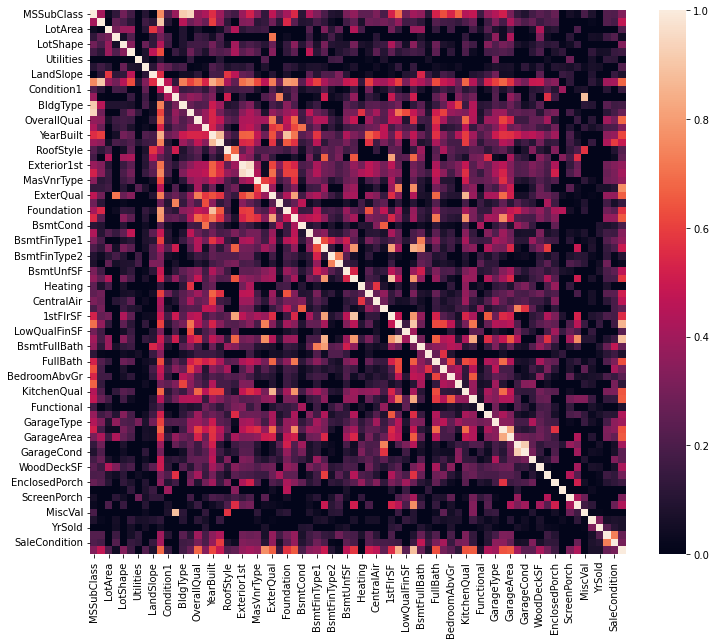

In [549]:
import seaborn as sns
import pandas as pd
plt.figure(figsize=(12, 10))
sns.heatmap(df.phik_matrix());

In [550]:
corr_matrix = df.corr().abs()
high_corr_var = np.where(corr_matrix>0.65)
high_corr_var = [(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('OverallQual', 'SalePrice'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('2ndFlrSF', 'GrLivArea'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GrLivArea', 'SalePrice'),
 ('BedroomAbvGr', 'TotRmsAbvGrd'),
 ('GarageCars', 'GarageArea')]

In [551]:
col_to_del = ['1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageCars']

In [552]:
df.drop(col_to_del, axis=1, inplace=True)

In [553]:
# Выделение целевого признака

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [607]:
# Разделение выборок

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=rs)

In [608]:
object_cols = [i for i in df.dtypes[df.dtypes == 'object'].index]
object_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [609]:
OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_OHE_cols = pd.DataFrame(OHE.fit_transform(X_train[object_cols]))
X_test_OHE_cols = pd.DataFrame(OHE.transform(X_test[object_cols]))

In [610]:
names_of_columns = OHE.get_feature_names(object_cols)

In [611]:
# Кодирование трейна

X_train_OHE_cols.index = X_train.index
X_train_OHE_cols.columns = names_of_columns

num_train = X_train.drop(object_cols, axis=1)


OHE_train = pd.concat([num_train, X_train_OHE_cols], axis=1)

OHE_train.info()

OHE_train = OHE_train.astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 1453 to 272
Columns: 249 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(221), int64(28)
memory usage: 2.0 MB


In [617]:
X_train = OHE_train

In [612]:
# Кодирование теста

X_test_OHE_cols.index = X_test.index
X_test_OHE_cols.columns = names_of_columns

num_test = X_test.drop(object_cols, axis=1)


OHE_test = pd.concat([num_test, X_test_OHE_cols], axis=1)

OHE_test.info()

OHE_test = OHE_test.astype('int')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 145 to 803
Columns: 249 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(221), int64(28)
memory usage: 523.4 KB


In [618]:
X_test = OHE_test

In [613]:
numerical = [
    'BsmtFinSF1', 'BsmtFinSF2', 
    'BsmtUnfSF', 'TotalBsmtSF', 
    'BsmtFullBath', 'BsmtHalfBath', 'GarageArea'
]

df[feature] = df[feature].astype('int64')

In [614]:
# Стандартизация

scaler = StandardScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

# Models Learning

## Linear Regression

In [621]:
%%time
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_train)

Wall time: 23.9 ms


In [623]:
lr_r2 = r2_score(y_train, lr_pred)
print(f'R2_score of Linear Regression model = {lr_r2}')

R2_score of Linear Regression model = 0.9409585411040676


## Lasso

In [624]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_train)

In [626]:
lasso_r2 = r2_score(y_train, lasso_pred)
print(f'R2_score of Lasso model = {lasso_r2}')
print(f'RMSE of Lasso model = {mean_squared_error(y_train, lasso_pred)**0.5}')
print(f'MAE of Lasso model = {mean_absolute_error(y_train, lasso_pred)}')
print(f'MAPE of Lasso model = {mean_absolute_percentage_error(y_train, lasso_pred)}')

R2_score of Lasso model = 0.940945308274163
RMSE of Lasso model = 19540.659417587478
MAE of Lasso model = 13115.241919795879
MAPE of Lasso model = 0.07370231423957477


## Random Forest Regressor

In [627]:
rfr_model = RandomForestRegressor()
rfr_params = {'n_estimators': range(200, 601, 300),
              'max_depth': range(6,13,6)}
rfr_grid = GridSearchCV(rfr_model, rfr_params, cv=3, scoring='r2')

In [628]:
%%time

rfr_grid.fit(X_train, y_train)
print(rfr_grid.best_score_)
print(rfr_grid.best_params_)
rfr_best_est = rfr_grid.best_estimator_
rfr_score = rfr_grid.best_score_

0.8128235435048307
{'max_depth': 12, 'n_estimators': 200}
Wall time: 40.9 s


In [629]:
rfr_pred = rfr_best_est.predict(X_train)

In [630]:
rfr_r2 = r2_score(y_train, rfr_pred)
print(f'R2_score of RandomForestRegressor model = {rfr_r2}')
print(f'RMSE of RandomForestRegressor model = {mean_squared_error(y_train, rfr_pred)**0.5}')
print(f'MAE of RandomForestRegressor model = {mean_absolute_error(y_train, rfr_pred)}')
print(f'MAPE of RandomForestRegressor model = {mean_absolute_percentage_error(y_train, rfr_pred)}')

R2_score of RandomForestRegressor model = 0.975768165054668
RMSE of RandomForestRegressor model = 12517.141535897963
MAE of RandomForestRegressor model = 7288.0436485735145
MAPE of RandomForestRegressor model = 0.04005997317053391


## Ridge

In [631]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_train)

In [632]:
ridge_r2 = r2_score(y_train, ridge_pred)
print(f'R2_score of ridge model = {ridge_r2}')
print(f'RMSE of ridge model = {mean_squared_error(y_train, ridge_pred)**0.5}')
print(f'MAE of ridge model = {mean_absolute_error(y_train, ridge_pred)}')
print(f'MAPE of ridge model = {mean_absolute_percentage_error(y_train, ridge_pred)}')

R2_score of ridge model = 0.9243378631998741
RMSE of ridge model = 22118.278035189753
MAE of ridge model = 14118.095565545234
MAPE of ridge model = 0.07823984170228941


## LGBMRegressor

In [633]:
lgbmr = LGBMRegressor()
params = {'n_estimators': range(100, 501, 100),
          'max_depth':(3,16,3)}
lgbmr_grid = GridSearchCV(lgbmr, params, cv=3, scoring='r2')

In [634]:
%%time

lgbmr_grid.fit(X_train, y_train)
print(lgbmr_grid.best_score_)
print(lgbmr_grid.best_params_)
lgbmr_best_score = lgbmr_grid.best_score_
lgbmr_best_est = lgbmr_grid.best_estimator_

0.8309106976224028
{'max_depth': 3, 'n_estimators': 100}
Wall time: 11.8 s


In [635]:
lgbmr_pred = lgbmr_best_est.predict(X_train)

In [636]:
lgbmr_r2 = r2_score(y_train, lgbmr_pred)
print(f'R2_score of lgbmr model = {lgbmr_r2}')
print(f'RMSE of lgbmr model = {mean_squared_error(y_train, lgbmr_pred)**0.5}')
print(f'MAE of lgbmr model = {mean_absolute_error(y_train, lgbmr_pred)}')
print(f'MAPE of lgbmr model = {mean_absolute_percentage_error(y_train, lgbmr_pred)}')

R2_score of lgbmr model = 0.9377221892598108
RMSE of lgbmr model = 20066.82580044352
MAE of lgbmr model = 12488.56315329525
MAPE of lgbmr model = 0.07013885028180286


## XGBRegressor

In [637]:
xgbr = XGBRegressor()
params = {'n_estimators': range(100, 301, 100),
          'max_depth':(2,9,2)}
xgbr_grid = GridSearchCV(xgbr, params, cv=3, scoring='r2')

In [638]:
%%time

xgbr_grid.fit(X_train, y_train)
print(xgbr_grid.best_score_)
print(xgbr_grid.best_params_)
xgbr_best_score = xgbr_grid.best_score_
xgbr_best_est = xgbr_grid.best_estimator_

0.8011902190555323
{'max_depth': 2, 'n_estimators': 300}
Wall time: 30.6 s


In [639]:
xgbr_pred = xgbr_best_est.predict(X_train)

In [640]:
xgbr_r2 = r2_score(y_train, xgbr_pred)
print(f'R2_score of xgbr model = {xgbr_r2}')
print(f'RMSE of xgbr model = {mean_squared_error(y_train, xgbr_pred)**0.5}')
print(f'MAE of xgbr model = {mean_absolute_error(y_train, xgbr_pred)}')
print(f'MAPE of xgbr model = {mean_absolute_percentage_error(y_train, xgbr_pred)}')

R2_score of xgbr model = 0.9885200133770123
RMSE of xgbr model = 8615.543963833403
MAE of xgbr model = 6536.478066588785
MAPE of xgbr model = 0.038481588831026925


# Testing

Наилучшим образом показала себя модель **XGBRegressor**, ее мы изберем для тестирования

In [649]:
best_model = xgbr_best_est
best_model_pred = best_model.predict(X_test)

In [651]:
best_model_r2 = r2_score(y_test, best_model_pred)

print(f'R2_score of xgbr model = {best_model_r2}')
print(f'RMSE of xgbr model = {mean_squared_error(y_test, best_model_pred)**0.5}')
print(f'MAE of xgbr model = {mean_absolute_error(y_test, best_model_pred)}')
print(f'MAPE of xgbr model = {mean_absolute_percentage_error(y_test, best_model_pred)}')

R2_score of xgbr model = 0.703136359110871
RMSE of xgbr model = 39355.02120679036
MAE of xgbr model = 18289.015289762126
MAPE of xgbr model = 0.10409837518684861


☔☔☔